# Feature Selector - Module Guide

This notebook showcases the usage of the FeatureSelector module.

#### Imports

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

#Import packages/modules
from FeatureSelector import FeatureSelector as fs
from FeatureSelector import plot_tools as fs_plot

### Generate Sample

In [2]:
#generate sample for classification modelling
X, y = make_classification(n_samples=5000, n_features=100, n_informative=20, scale=None,
                           weights=[0.6], n_redundant=50, n_repeated=5, n_classes=2,
                           shuffle=True)
df = pd.DataFrame(X, columns=['feature_'+str(ii) for ii in range(X.shape[1])])
df['target'] = y

In [3]:
#separate features and values
X_data = df.iloc[:, :-1]
y_data = df.iloc[:, -1]

In [4]:
df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,target
0,798.273989,7.685653,30.413759,26.775068,-1.857247,13.911438,321.665688,29.680479,-2.238093,80.434977,...,79.536457,15.541109,84.056039,-27.594022,-11.135352,44.670078,-305.201856,13.229329,-10.020511,1
1,-800.654520,-23.705956,75.724413,344.581114,-525.192091,-1.810883,481.737380,-27.127383,-399.524522,1.441318,...,-307.458678,21.516659,-67.549796,63.623743,55.870039,-7.426335,-65.100908,-211.482283,-2.202616,0
2,140.166410,-16.872173,35.740143,279.541852,-45.804641,5.657254,-486.604681,10.928475,81.669089,19.552150,...,-89.252716,-10.738861,-137.362668,106.322398,-208.004842,92.382370,-194.270618,299.189269,-73.737512,0
3,202.559744,10.670073,-35.471757,-127.191853,-672.964035,-5.743811,-1316.539230,61.797768,285.073887,-3.005596,...,-626.909365,-40.040684,-23.483490,120.633748,-214.657160,7.828862,-16.770439,329.204713,-3.210381,0
4,-333.200322,-9.845767,-6.371173,271.151192,205.253222,27.252447,416.922243,24.942130,1.254584,17.572730,...,-48.257676,-3.037920,127.683939,-457.051998,-85.774567,32.944992,128.583206,-319.550151,80.527105,1


## Apply Transformations

In [5]:
#without combining original data
X_data_tf = fs.transformations(X_data)
X_data_tf.head()

,feature_0_YEO_JON,feature_1_YEO_JON,feature_2_YEO_JON,feature_3_YEO_JON,feature_4_YEO_JON,feature_5_YEO_JON,feature_6_YEO_JON,feature_7_YEO_JON,feature_8_YEO_JON,feature_9_YEO_JON,...,feature_90_YEO_JON,feature_91_YEO_JON,feature_92_YEO_JON,feature_93_YEO_JON,feature_94_YEO_JON,feature_95_YEO_JON,feature_96_YEO_JON,feature_97_YEO_JON,feature_98_YEO_JON,feature_99_YEO_JON
0,1.354519,0.593820,0.632858,0.079514,0.412356,0.982200,0.967116,0.437346,0.391726,1.399935,...,-1.101705,0.301456,0.377029,1.191778,-0.071368,0.293180,1.413456,-1.101048,0.441288,-0.177878
1,-1.180509,-1.884770,1.557087,1.437385,-0.558299,-0.144085,1.267529,-0.421799,-1.303486,0.003284,...,-0.012089,-1.271350,0.589214,-0.926914,0.109554,1.076436,-0.175655,-0.051219,-0.154705,-0.048393
2,0.283419,-1.345139,0.741434,1.157676,0.330879,0.388107,-0.565986,0.150782,0.739851,0.320455,...,-0.839326,-0.377014,-0.568196,-1.925506,0.195007,-1.759199,2.852965,-0.615931,1.148813,-1.234804
3,0.384563,0.829406,-0.702614,-0.530546,-0.832434,-0.420240,-2.152998,0.929584,1.578685,-0.072929,...,0.609326,-2.585217,-1.642310,-0.298965,0.223675,-1.827579,0.295590,0.159971,1.222557,-0.065075
4,-0.459754,-0.790311,-0.115158,1.121634,0.795820,1.946721,1.145909,0.364852,0.406394,0.285607,...,-0.749905,-0.209657,-0.287632,1.789776,-0.905465,-0.494521,1.058620,0.793266,-0.444826,1.315548


In [6]:
#combining with original data
X_data_tf2 = fs.transformations(X_data, combine=True)
X_data_tf2.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_90_YEO_JON,feature_91_YEO_JON,feature_92_YEO_JON,feature_93_YEO_JON,feature_94_YEO_JON,feature_95_YEO_JON,feature_96_YEO_JON,feature_97_YEO_JON,feature_98_YEO_JON,feature_99_YEO_JON
0,798.273989,7.685653,30.413759,26.775068,-1.857247,13.911438,321.665688,29.680479,-2.238093,80.434977,...,-1.101705,0.301456,0.377029,1.191778,-0.071368,0.293180,1.413456,-1.101048,0.441288,-0.177878
1,-800.654520,-23.705956,75.724413,344.581114,-525.192091,-1.810883,481.737380,-27.127383,-399.524522,1.441318,...,-0.012089,-1.271350,0.589214,-0.926914,0.109554,1.076436,-0.175655,-0.051219,-0.154705,-0.048393
2,140.166410,-16.872173,35.740143,279.541852,-45.804641,5.657254,-486.604681,10.928475,81.669089,19.552150,...,-0.839326,-0.377014,-0.568196,-1.925506,0.195007,-1.759199,2.852965,-0.615931,1.148813,-1.234804
3,202.559744,10.670073,-35.471757,-127.191853,-672.964035,-5.743811,-1316.539230,61.797768,285.073887,-3.005596,...,0.609326,-2.585217,-1.642310,-0.298965,0.223675,-1.827579,0.295590,0.159971,1.222557,-0.065075
4,-333.200322,-9.845767,-6.371173,271.151192,205.253222,27.252447,416.922243,24.942130,1.254584,17.572730,...,-0.749905,-0.209657,-0.287632,1.789776,-0.905465,-0.494521,1.058620,0.793266,-0.444826,1.315548


## Run Selection Tests

### F-Statistic (ANOVA)

In [7]:
%%time
#run test
results, p_vals = fs.f_test(X_data, y_data, kbest=100, p_vals=True)

Wall time: 6.95 ms


In [8]:
#register results
feature_importance = pd.DataFrame(results.values, index=results.index, columns=['f_test'])
feature_importance_values = pd.DataFrame(p_vals.values, index=p_vals.index, columns=['f_test'])

In [9]:
feature_importance.head()

,f_test
feature_0,58
feature_1,10
feature_2,11
feature_3,60
feature_4,89


In [10]:
feature_importance_values.head()

,f_test
feature_0,15.045036
feature_1,0.093328
feature_2,0.157076
feature_3,15.890545
feature_4,52.365098


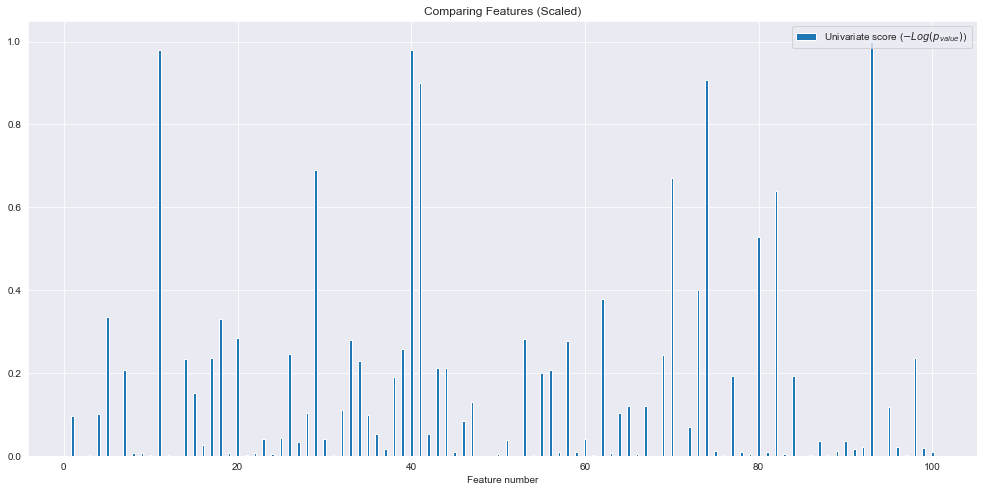

In [11]:
fs_plot.plot_feature_comparison(p_vals, norm=True, label=r'Univariate score ($-Log(p_{value})$)',
                                title='Comparing Features (Scaled)')

### Mutual Information Test

In [12]:
%%time
#run test
results, mi_vals = fs.mitest(X_data, y_data, n_neighbors=5, mi_vals=True)

Wall time: 2.92 s


In [13]:
#register results
feature_importance['mi_test'] = results
feature_importance_values['mi_test'] = mi_vals

In [14]:
feature_importance.head()

,f_test,mi_test
feature_0,58,62
feature_1,10,48
feature_2,11,31
feature_3,60,73
feature_4,89,70


In [15]:
feature_importance_values.head()

,f_test,mi_test
feature_0,15.045036,0.011907
feature_1,0.093328,0.007541
feature_2,0.157076,0.000502
feature_3,15.890545,0.019648
feature_4,52.365098,0.018734


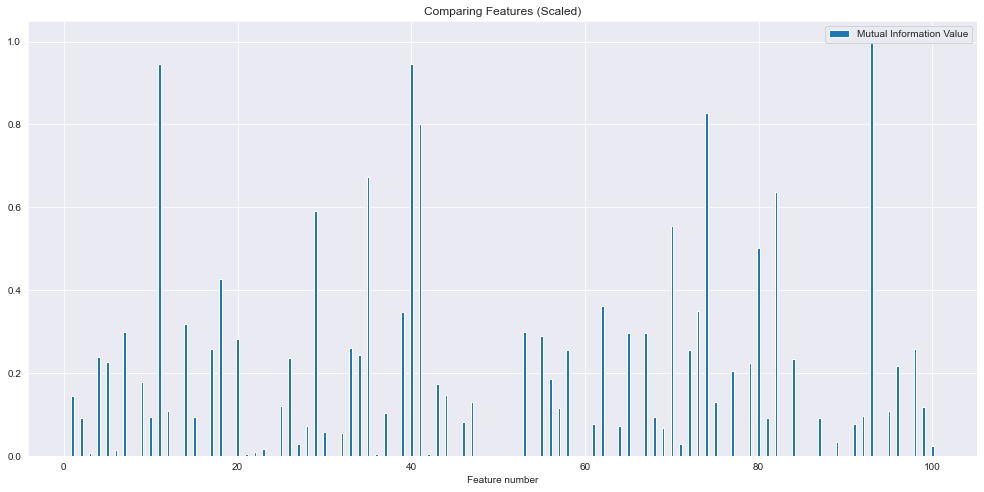

In [16]:
fs_plot.plot_feature_comparison(mi_vals, norm=True, label=r'Mutual Information Value',
                                title='Comparing Features (Scaled)')

### Machine Learning Model - Recursive Factor Elimination

In [17]:
#define model
rf = RandomForestClassifier(n_estimators=200, max_depth=5, n_jobs=4, max_features='sqrt')

In [18]:
%%time
#run test
results, feat_stats, scores = fs.Recursive_Factor_EliminationCV(
    estimator=rf,
    X=X_data,
    y=y_data,
    step=2,
    min_features_to_select=10,
    standardise=False,
    criterion='roc_auc',
    clf_choose='best',
    cv=5,
    n_jobs=4)


Wall time: 2min 3s


In [19]:
#register results
feature_importance['rf_test'] = results
feature_importance_values['rf_test'] = feat_stats.iloc[:, -1]

In [20]:
feature_importance.head()

,f_test,mi_test,rf_test
feature_0,58,62,52
feature_1,10,48,3
feature_2,11,31,11
feature_3,60,73,84
feature_4,89,70,68


In [21]:
feature_importance_values.head()

,f_test,mi_test,rf_test
feature_0,15.045036,0.011907,NaN
feature_1,0.093328,0.007541,NaN
feature_2,0.157076,0.000502,NaN
feature_3,15.890545,0.019648,NaN
feature_4,52.365098,0.018734,NaN


#### Plot Results

- Plotting scores during recursive feature selection process

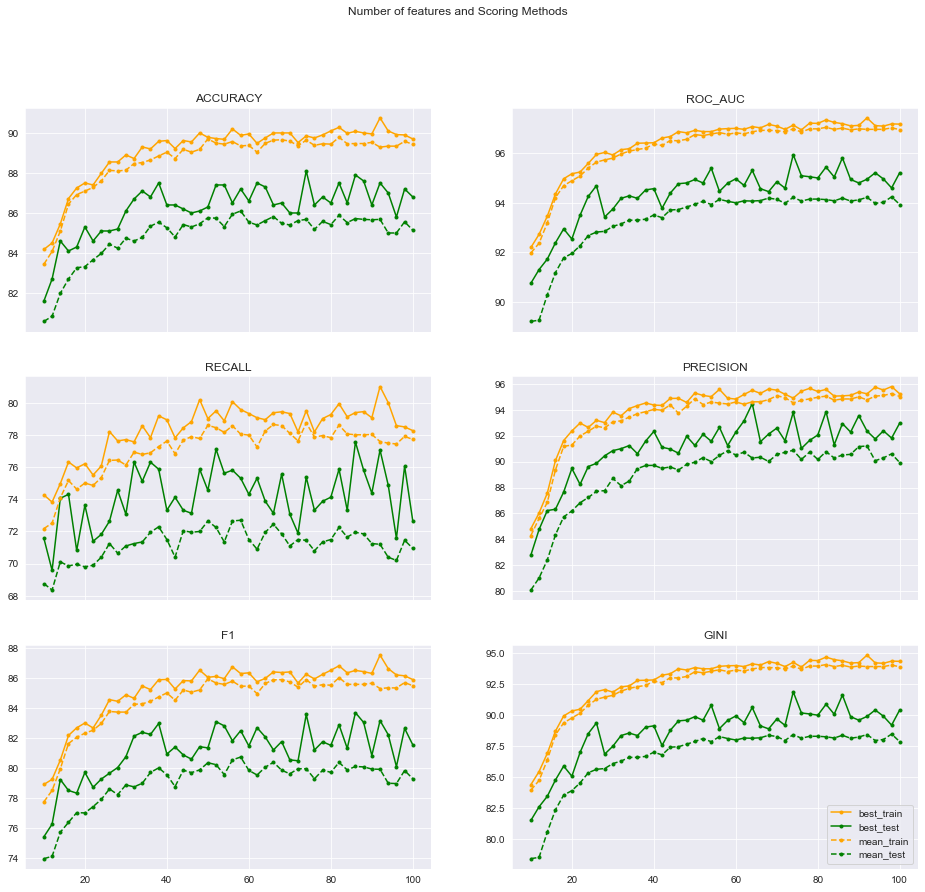

In [22]:
fs_plot.plot_metrics_check(scores)

- Plotting feature importance throughout iterations

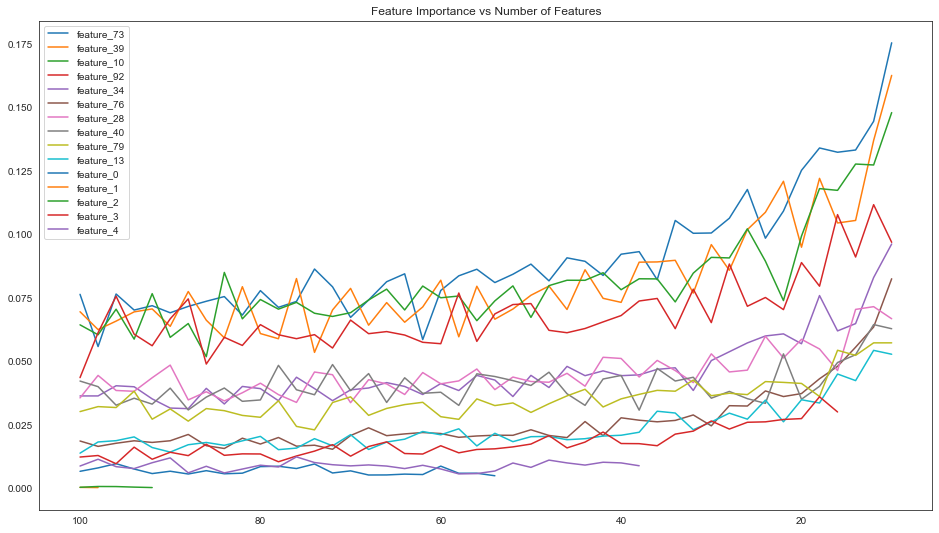

In [23]:
fs_plot.plot_feature_performance(feat_stats, topk=15, legend=True)